Import necessary libraries.

In [128]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import zscore
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


Read from excel files.

In [129]:
sheetname='OD_Rimbursimet.rdl'

df_2023 = pd.read_excel("datasets/Rimbursimet-2023.xlsx",sheet_name=sheetname,skiprows=5)

df_2022 = pd.read_excel("datasets/Rimbursimet-2022.xlsx",sheet_name=sheetname,skiprows=5)

df_2021 = pd.read_excel("datasets/Rimbursimet-2021.xlsx",sheet_name=sheetname,skiprows=5)

df_2020 = pd.read_excel("datasets/Rimbursimet-2020.xlsx",sheet_name=sheetname,skiprows=5)

df_2019 = pd.read_excel("datasets/Rimbursimet-2019.xlsx",sheet_name=sheetname,skiprows=5)

Merge dataframes.

In [130]:
df = pd.concat([df_2023,df_2022,df_2021,df_2020,df_2019])
df.columns

Index(['Viti\nGodina\nYear', 'Muaji\nMesec\nMonth',
       'Përshkrimi i Sektorit (Kryesor)\nOpis (Glavnog) Sektora\nDescription of (Primary) Sector',
       'Unnamed: 3',
       'Statusi i Regjistrimit\nStatus Registracije\nRegistration Status',
       'Komuna\nOpština\nMunicipality',
       'Numri i Kërkesave për Rimbursim\nBroj zahteva za rimbursiju\nNumber of Refund Requests',
       'Vlerat e Kërkuara për Rimbursim\nZahtevane vrednosti za rimbursiju\nValues Requested for Refund',
       'Numri i Kërkesave të Aprovuara për Rimbursim\nBroj odobrenih zahteva za rimbursiju\nNumber of Refund Requests Approved',
       'Vlerat e Aprovuara të Rimbursimit\nOdobrene vrednosti rimbursije\nApproved Refund Values',
       'Tatimpaguesve në kategorinë A\nPoreski obveznici kategorije A\nTaxpayers in category A',
       'Tatimpaguesve në kategorinë B\nPoreski obveznici kategorije B\nTaxpayers in category B',
       'Tatimpaguesve në kategorinë C\nPoreski obveznici kategorije C\nTaxpayers in cate

Drop columns starting with 'unnamed'.

In [131]:
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]
df.columns

Index(['Viti\nGodina\nYear', 'Muaji\nMesec\nMonth',
       'Përshkrimi i Sektorit (Kryesor)\nOpis (Glavnog) Sektora\nDescription of (Primary) Sector',
       'Statusi i Regjistrimit\nStatus Registracije\nRegistration Status',
       'Komuna\nOpština\nMunicipality',
       'Numri i Kërkesave për Rimbursim\nBroj zahteva za rimbursiju\nNumber of Refund Requests',
       'Vlerat e Kërkuara për Rimbursim\nZahtevane vrednosti za rimbursiju\nValues Requested for Refund',
       'Numri i Kërkesave të Aprovuara për Rimbursim\nBroj odobrenih zahteva za rimbursiju\nNumber of Refund Requests Approved',
       'Vlerat e Aprovuara të Rimbursimit\nOdobrene vrednosti rimbursije\nApproved Refund Values',
       'Tatimpaguesve në kategorinë A\nPoreski obveznici kategorije A\nTaxpayers in category A',
       'Tatimpaguesve në kategorinë B\nPoreski obveznici kategorije B\nTaxpayers in category B',
       'Tatimpaguesve në kategorinë C\nPoreski obveznici kategorije C\nTaxpayers in category C',
       'Mesa

Rename columns.

In [132]:
df = df.rename(columns={
        'Viti\nGodina\nYear': 'Viti', 
        'Muaji\nMesec\nMonth':'Muaji',
        'Përshkrimi i Sektorit (Kryesor)\nOpis (Glavnog) Sektora\nDescription of (Primary) Sector':'Sektori',
        'Statusi i Regjistrimit\nStatus Registracije\nRegistration Status':'Statusi',
        'Komuna\nOpština\nMunicipality':'Komuna',
        'Numri i Kërkesave për Rimbursim\nBroj zahteva za rimbursiju\nNumber of Refund Requests':'Numri i Kërkesave',
        'Vlerat e Kërkuara për Rimbursim\nZahtevane vrednosti za rimbursiju\nValues Requested for Refund':'Vlera e Kërkura',
        'Numri i Kërkesave të Aprovuara për Rimbursim\nBroj odobrenih zahteva za rimbursiju\nNumber of Refund Requests Approved':'Numri i Kërkesave të Aprovuara',
        'Vlerat e Aprovuara të Rimbursimit\nOdobrene vrednosti rimbursije\nApproved Refund Values':'Vlerat e Aprovuara',
        'Tatimpaguesve në kategorinë A\nPoreski obveznici kategorije A\nTaxpayers in category A':'Tatimpaguesve në kategorinë A',
        'Tatimpaguesve në kategorinë B\nPoreski obveznici kategorije B\nTaxpayers in category B':'Tatimpaguesve në kategorinë B',
        'Tatimpaguesve në kategorinë C\nPoreski obveznici kategorije C\nTaxpayers in category C':'Tatimpaguesve në kategorinë C',
        'Mesatarja e Ditëve të Kthimit të Rimbursimeve\nProsečni dani povrata za povraćaj sredstava\nAverage Return Days for Refunds':'Mesatarja e Ditëve të Kthimit',
        'Lloji i Formularit të Deklarimit\nVrsta Obrasca Izjave\nType of Declaration Form':'Lloji i Formularit të Deklarimit'
})

df.columns

Index(['Viti', 'Muaji', 'Sektori', 'Statusi', 'Komuna', 'Numri i Kërkesave',
       'Vlera e Kërkura', 'Numri i Kërkesave të Aprovuara',
       'Vlerat e Aprovuara', 'Tatimpaguesve në kategorinë A',
       'Tatimpaguesve në kategorinë B', 'Tatimpaguesve në kategorinë C',
       'Mesatarja e Ditëve të Kthimit', 'Lloji i Formularit të Deklarimit'],
      dtype='object')

Check for null values.

In [133]:
df.isnull().sum()

Viti                                0
Muaji                               0
Sektori                             0
Statusi                             0
Komuna                              0
Numri i Kërkesave                   0
Vlera e Kërkura                     0
Numri i Kërkesave të Aprovuara      0
Vlerat e Aprovuara                  0
Tatimpaguesve në kategorinë A       0
Tatimpaguesve në kategorinë B       0
Tatimpaguesve në kategorinë C       0
Mesatarja e Ditëve të Kthimit       0
Lloji i Formularit të Deklarimit    0
dtype: int64

In [134]:
df.head(5)

,Viti,Muaji,Sektori,Statusi,Komuna,Numri i Kërkesave,Vlera e Kërkura,Numri i Kërkesave të Aprovuara,Vlerat e Aprovuara,Tatimpaguesve në kategorinë A,Tatimpaguesve në kategorinë B,Tatimpaguesve në kategorinë C,Mesatarja e Ditëve të Kthimit,Lloji i Formularit të Deklarimit
0,2023,1,Bujqesia;Pylltaria dhe Peshkimi,SH.P.K.,DEÇAN,1,32690.41,0,0.0,0,1,0,14.6968,VALUE-ADDED TAX DECLARATION FORM
1,2023,1,Bujqesia;Pylltaria dhe Peshkimi,SH.P.K.,FERIZAJ,1,23500.00,0,0.0,0,1,0,33.2524,VALUE-ADDED TAX DECLARATION FORM
2,2023,1,Bujqesia;Pylltaria dhe Peshkimi,SH.P.K.,PODUJEVË,1,58500.00,0,0.0,1,0,0,18.9731,VALUE-ADDED TAX DECLARATION FORM
3,2023,1,Bujqesia;Pylltaria dhe Peshkimi,SH.P.K.,SHTËRPCË,1,83000.00,0,0.0,1,0,0,24.7561,VALUE-ADDED TAX DECLARATION FORM
4,2023,1,Bujqesia;Pylltaria dhe Peshkimi,SH.P.K.,GRAÇANICË,1,38400.00,0,0.0,1,0,0,16.1147,VALUE-ADDED TAX DECLARATION FORM


Remove rows where 'Vlera e Kërkura' is 0 and 'Sektori' is 'Mungon aktiviteti' , since there is no chance to make an rimburisement request with 0 amount.

In [135]:
df = df[(df['Vlera e Kërkura'] != 0) & (df['Sektori'] != 'Mungon aktiviteti')]

We identify as outliers values where 'Vlerat e Aprovuara' are grater then 'Vlerat e Kërkura', and remove them.

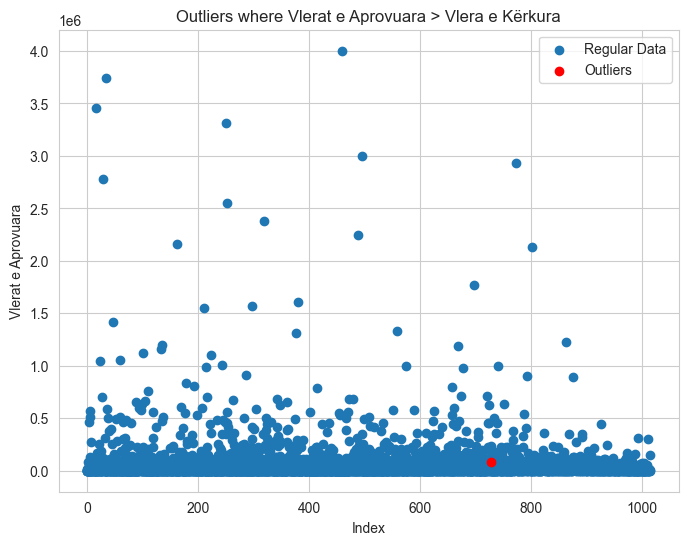

In [136]:
# Filter outliers where 'Vlerat e Aprovuara' > 'Vlera e Kërkura'
outliers_greater_than_vlera_kerkura = df[df['Vlerat e Aprovuara'] > df['Vlera e Kërkura']]

plt.figure(figsize=(8, 6))

plt.scatter(df.index, df['Vlerat e Aprovuara'], label='Regular Data')
plt.scatter(outliers_greater_than_vlera_kerkura.index, outliers_greater_than_vlera_kerkura['Vlerat e Aprovuara'], color='red', label='Outliers')
plt.title('Outliers where Vlerat e Aprovuara > Vlera e Kërkura')
plt.xlabel('Index')
plt.ylabel('Vlerat e Aprovuara')
plt.legend()

plt.show()

df = df[df['Vlerat e Aprovuara'] <= df['Vlera e Kërkura']]

Identify outliers using  the Z-score method.

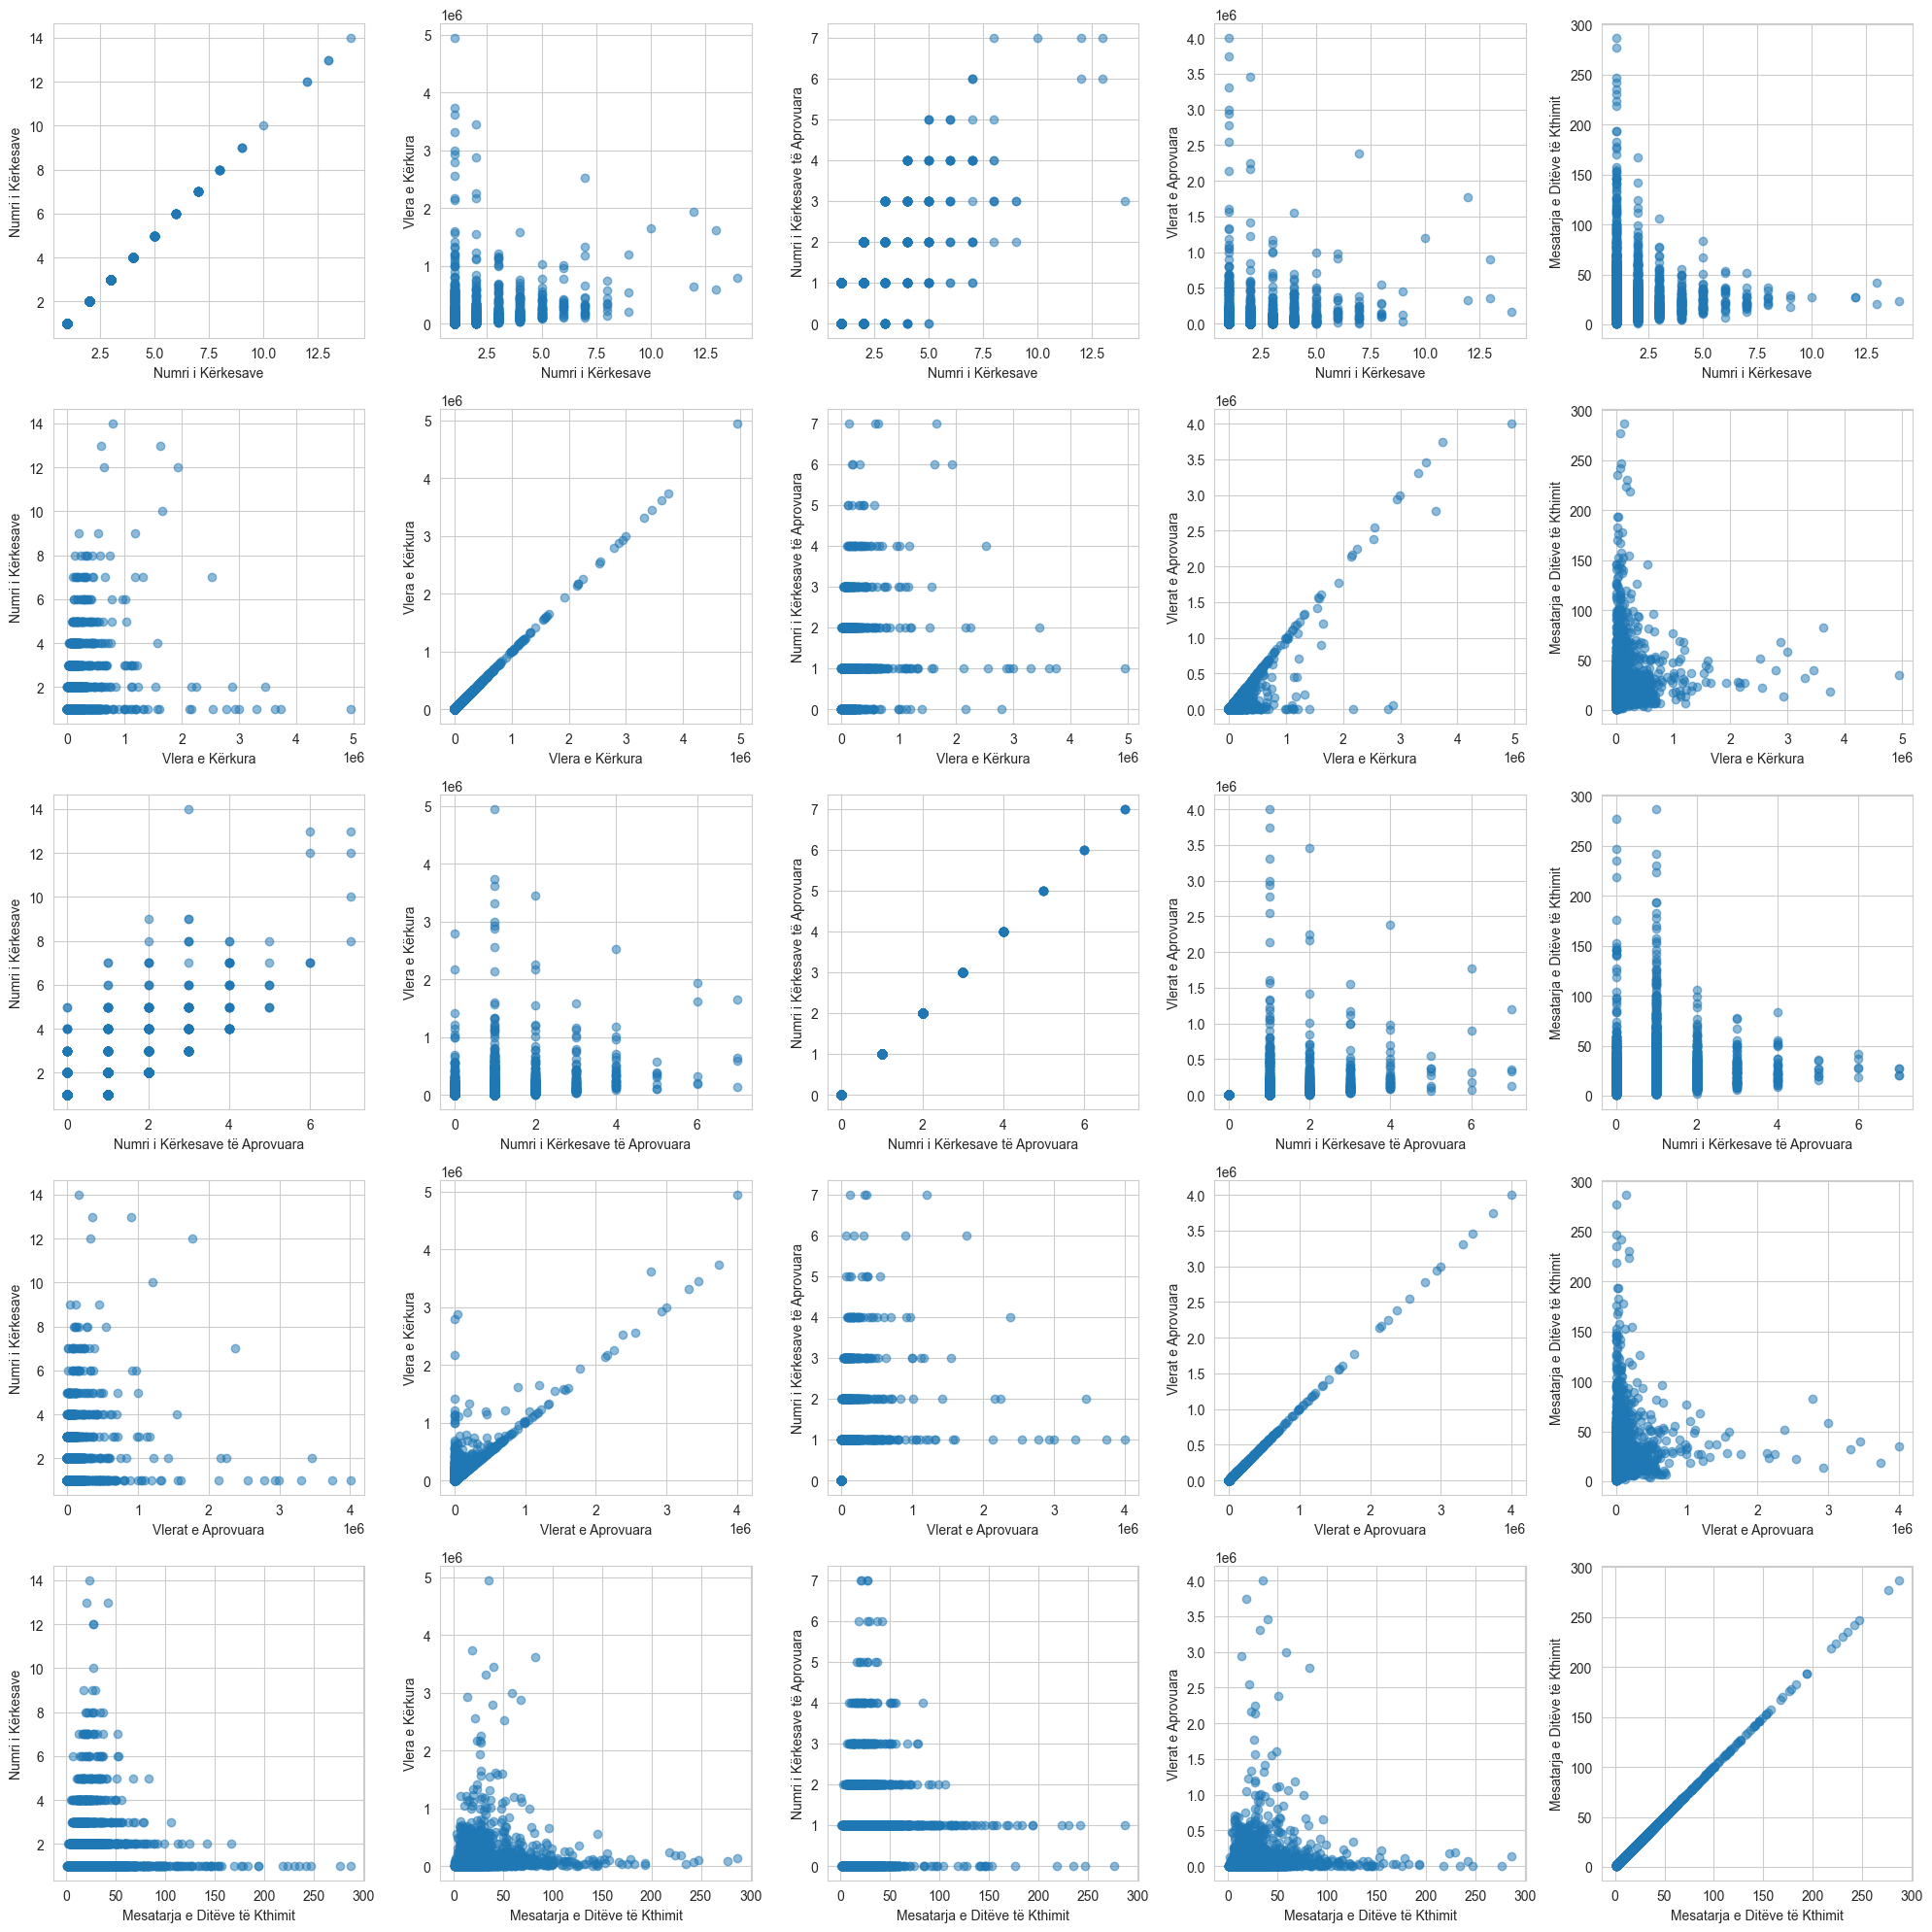

In [137]:

# Select only numeric columns
numeric_cols = ['Numri i Kërkesave', 'Vlera e Kërkura',
       'Numri i Kërkesave të Aprovuara', 'Vlerat e Aprovuara', 'Mesatarja e Ditëve të Kthimit']

numeric_df= df[numeric_cols]

# Calculate Z-scores
z_scores = numeric_df.apply(zscore)

# Get absolute Z-scores
abs_z_scores = np.abs(z_scores)

outliers = df[(abs_z_scores > 5).any(axis=1)]

num_cols = len(numeric_cols)
f, axes = plt.subplots(num_cols, num_cols, figsize=(4 * num_cols, 4 * num_cols))

# Create scatter plots for each pair of columns
for i, col1 in enumerate(numeric_cols):
    for j, col2 in enumerate(numeric_cols):
        axes[i, j].scatter(df[col1], df[col2], alpha=0.5)
        axes[i, j].set_xlabel(col1)
        axes[i, j].set_ylabel(col2)

plt.tight_layout()
plt.show()


Remove outliers from the DataFrame

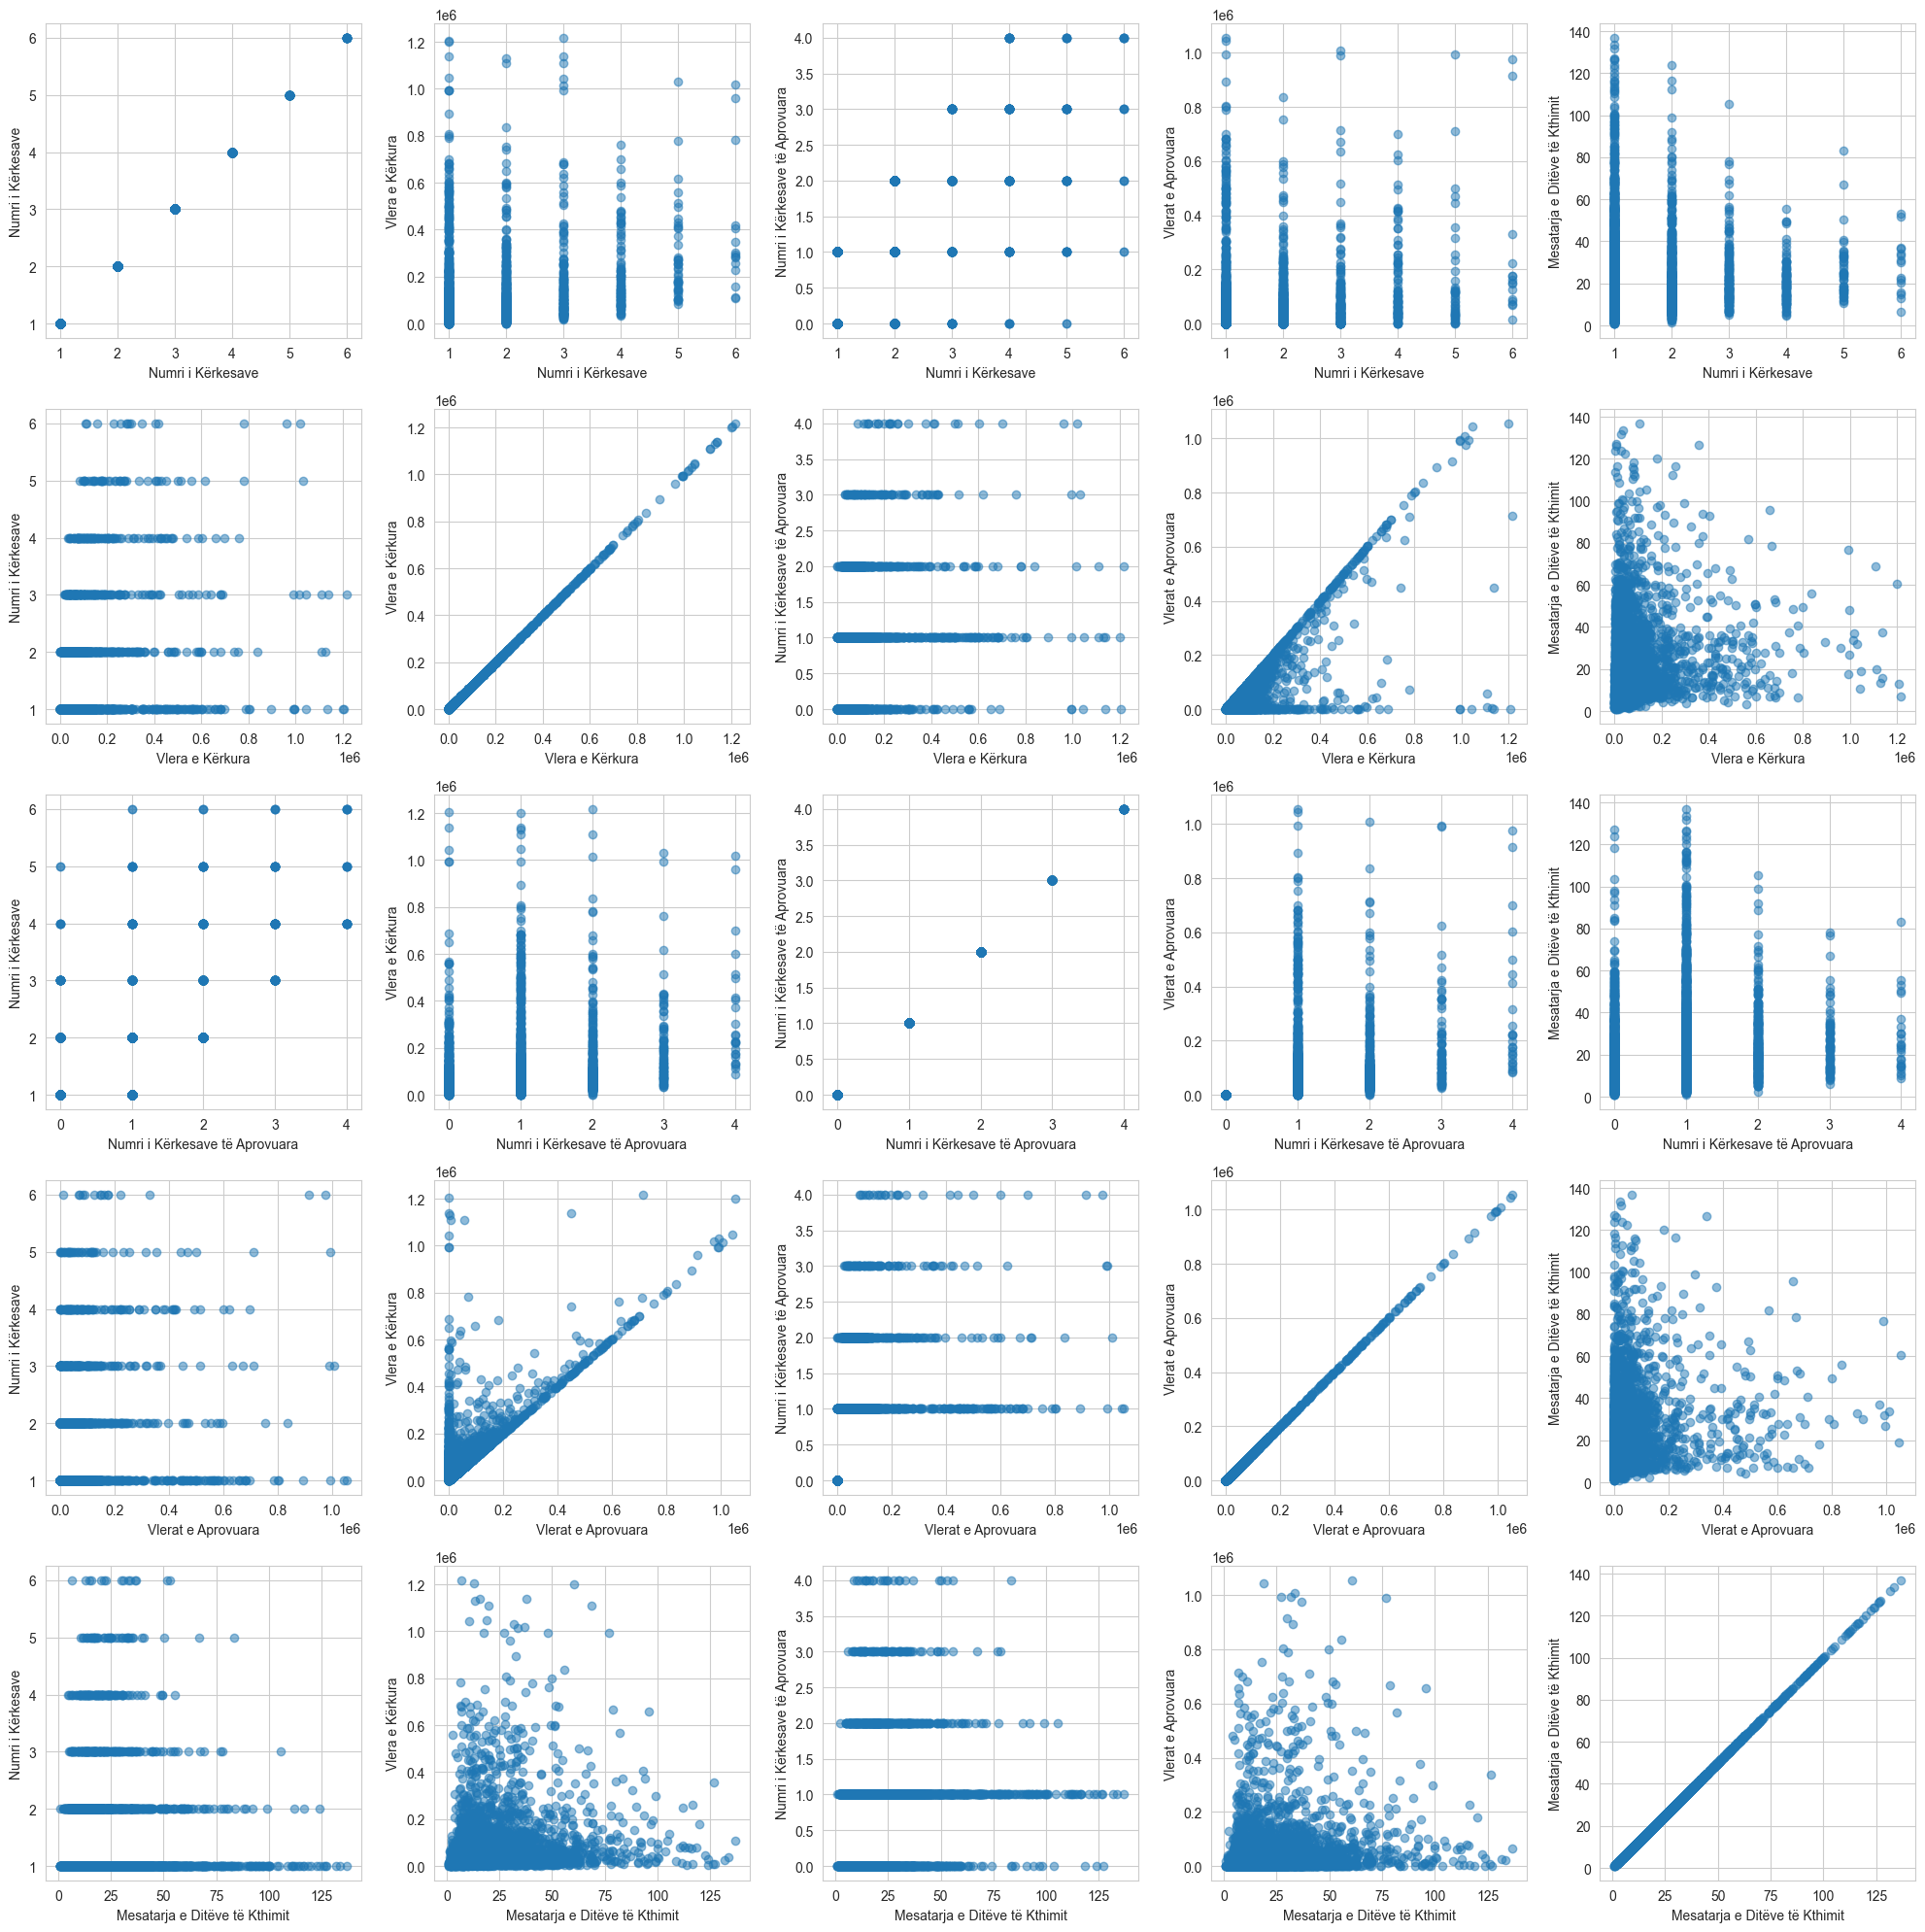

In [138]:
# Remove outliers from the DataFrame
cleaned_df = df[~(abs_z_scores > 5).any(axis=1)]

# Set up the matplotlib figure
num_cols = len(numeric_cols)
f, axes = plt.subplots(num_cols, num_cols, figsize=(4 * num_cols, 4 * num_cols))

# Create scatter plots for each pair of columns in the cleaned DataFrame
for i, col1 in enumerate(numeric_cols):
    for j, col2 in enumerate(numeric_cols):
        axes[i, j].scatter(cleaned_df[col1], cleaned_df[col2], alpha=0.5)
        axes[i, j].set_xlabel(col1)
        axes[i, j].set_ylabel(col2)

plt.tight_layout()
plt.show()

df = cleaned_df


In [139]:
df.shape

(3923, 14)

Applying SMOTE algorithm with 'Sector' as target value, to balance data for Sector classes.

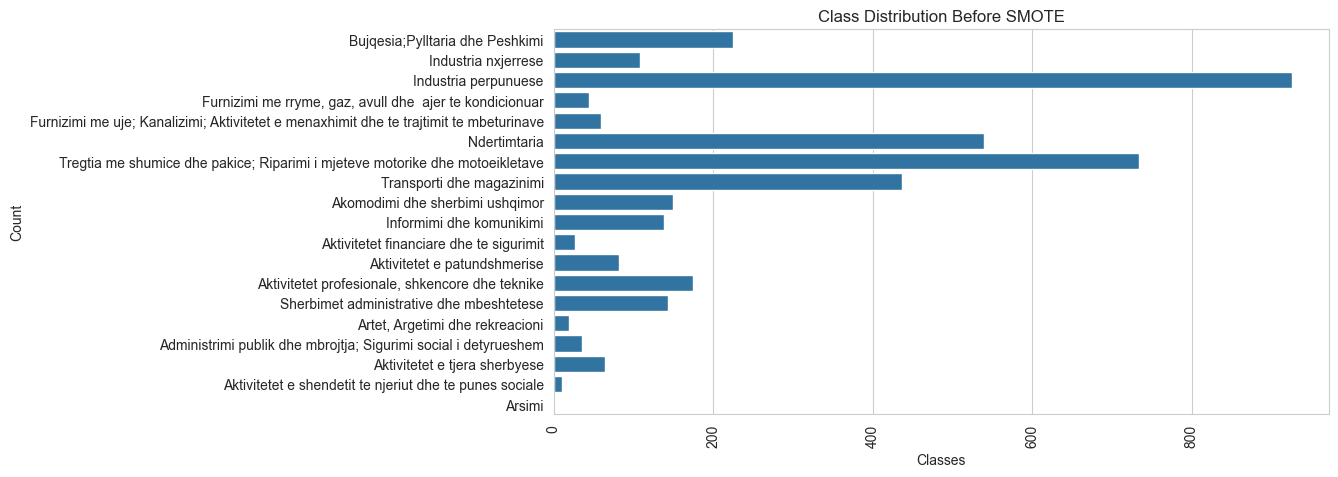

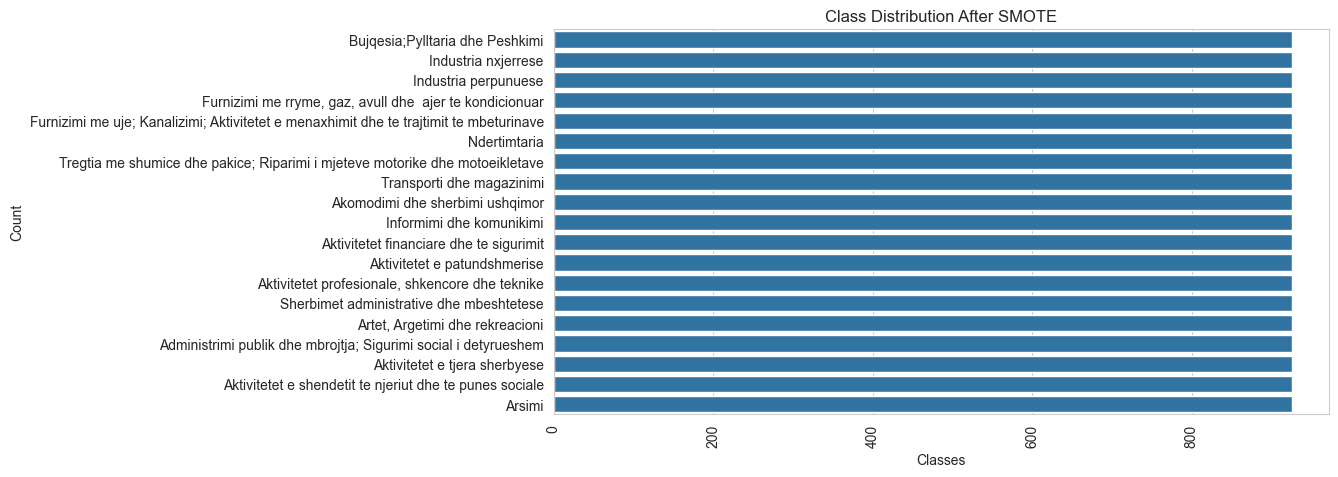

In [140]:
X = df.drop(columns=['Sektori','Statusi','Komuna','Lloji i Formularit të Deklarimit'])
y = df['Sektori']

smote = SMOTE(random_state=42,k_neighbors=1)

X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

def plot_class_distribution(y, title):
    plt.figure(figsize=(10, 5))
    sns.countplot(y)
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

plot_class_distribution(y, 'Class Distribution Before SMOTE')

plot_class_distribution(y_resampled, 'Class Distribution After SMOTE')

Skewness

Skewed columns and their skewness:
Numri i Kërkesave                 2.724278
Vlera e Kërkura                   4.110220
Numri i Kërkesave të Aprovuara    1.029014
Vlerat e Aprovuara                4.606886
Mesatarja e Ditëve të Kthimit     2.048666
dtype: float64


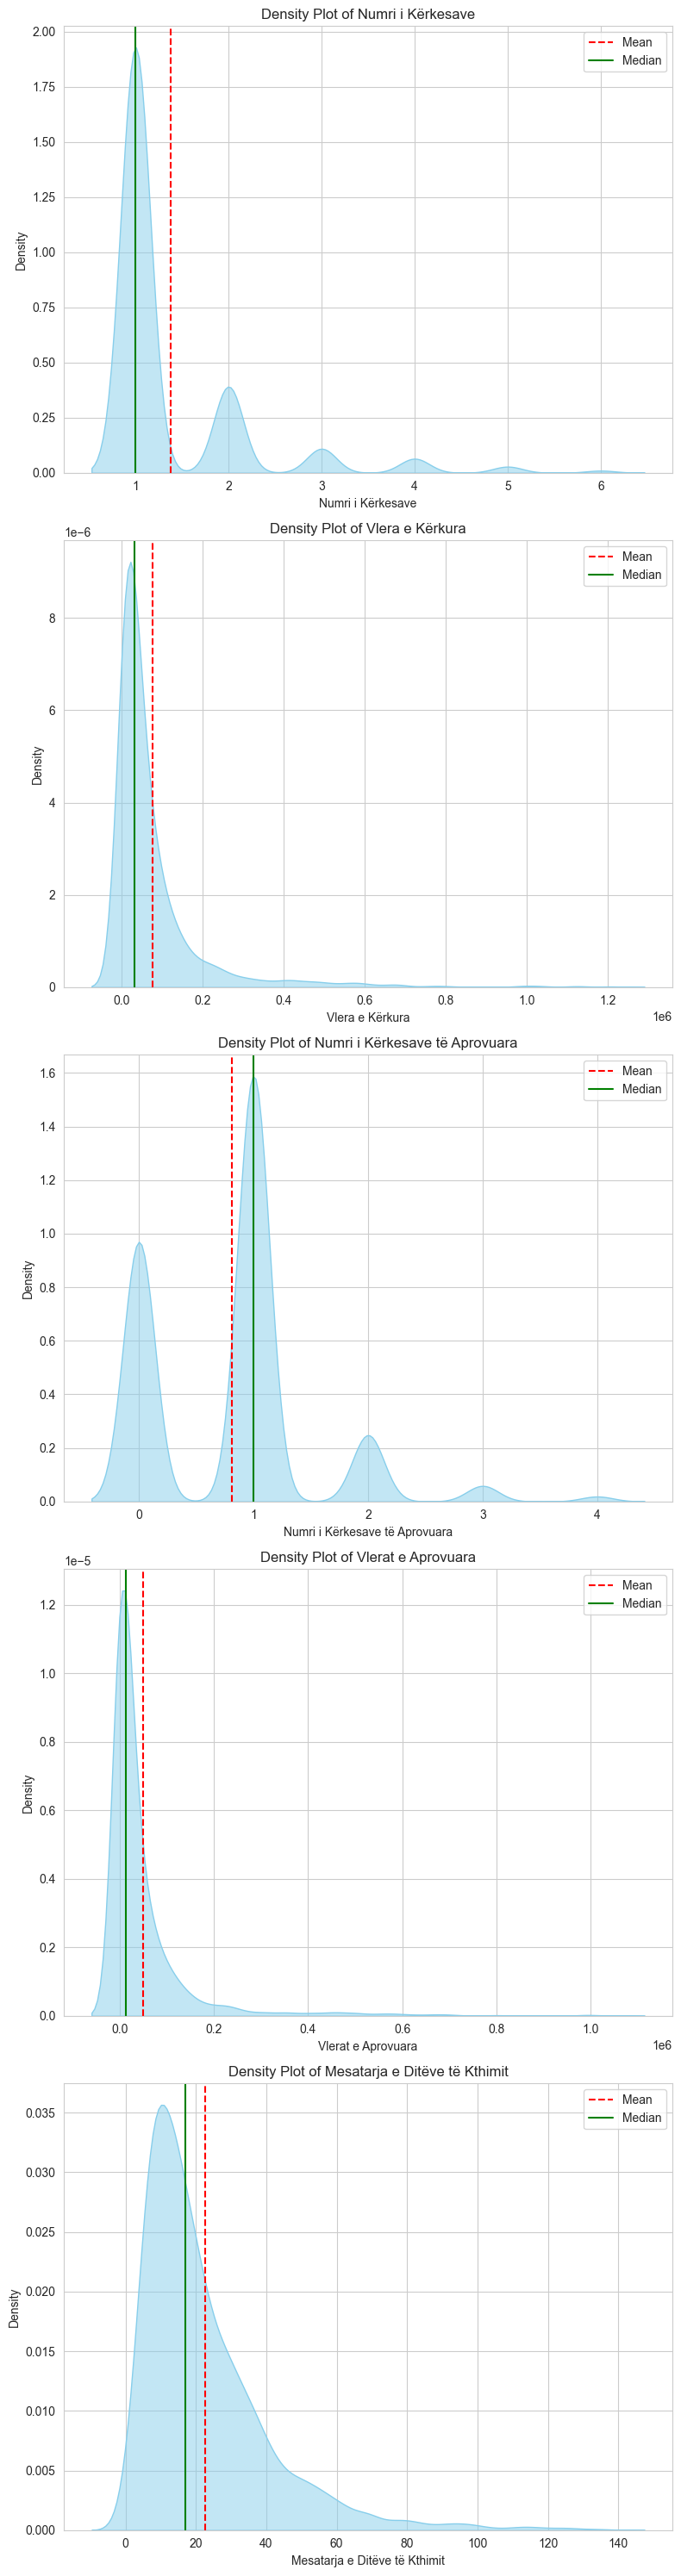

In [141]:
# Calculate skewness for each numerical column
numeric_cols = ['Numri i Kërkesave', 'Vlera e Kërkura',
       'Numri i Kërkesave të Aprovuara', 'Vlerat e Aprovuara', 'Mesatarja e Ditëve të Kthimit']

numeric_df= df[numeric_cols]
skewness = numeric_df.skew()

# Filter columns with skewness greater than a certain threshold (e.g., 0.5 for moderate skewness)
skewed_columns = skewness[abs(skewness) > 0.5].index

print("Skewed columns and their skewness:")
print(skewness[skewed_columns])

sns.set_style('whitegrid')

fig, axs = plt.subplots(nrows=len(skewed_columns), figsize=(8, 6 * len(skewed_columns)))

for i, col in enumerate(skewed_columns):
    sns.kdeplot(df[col], ax=axs[i], fill=True, color='skyblue', alpha=0.5)
    axs[i].axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    axs[i].axvline(df[col].median(), color='green', linestyle='-', label='Median')
    axs[i].set_title(f'Density Plot of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Density')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [142]:
df.columns

Index(['Viti', 'Muaji', 'Sektori', 'Statusi', 'Komuna', 'Numri i Kërkesave',
       'Vlera e Kërkura', 'Numri i Kërkesave të Aprovuara',
       'Vlerat e Aprovuara', 'Tatimpaguesve në kategorinë A',
       'Tatimpaguesve në kategorinë B', 'Tatimpaguesve në kategorinë C',
       'Mesatarja e Ditëve të Kthimit', 'Lloji i Formularit të Deklarimit'],
      dtype='object')

Function to train data using Gradient Boosting Regressor model.

In [143]:
def train_and_evaluate_gb_regressor(df):
    X_reimbursement_gbr = df[['Viti', 'Muaji','Numri i Kërkesave',
                              'Vlera e Kërkura', 'Numri i Kërkesave të Aprovuara', 
                              'Tatimpaguesve në kategorinë A', 'Tatimpaguesve në kategorinë B', 
                              'Tatimpaguesve në kategorinë C']]
    y_reimbursement_gbr = df['Vlerat e Aprovuara']

    X_train_reimbursement_gbr, X_test_reimbursement_gbr, y_train_reimbursement_gbr, y_test_reimbursement_gbr = \
        train_test_split(X_reimbursement_gbr, y_reimbursement_gbr, test_size=0.2, random_state=42)

    reimbursement_model_gbr = GradientBoostingRegressor()
    reimbursement_model_gbr.fit(X_train_reimbursement_gbr, y_train_reimbursement_gbr)

    # Predict reimbursement values
    reimbursement_predictions_gbr = reimbursement_model_gbr.predict(X_test_reimbursement_gbr)

    # Calculate Mean Absolute Error
    mae_gbr = mean_absolute_error(y_test_reimbursement_gbr, reimbursement_predictions_gbr)

    # Calculate Mean Squared Error
    mse_gbr = mean_squared_error(y_test_reimbursement_gbr, reimbursement_predictions_gbr)

    # Calculate Root Mean Squared Error
    rmse_gbr = mean_squared_error(y_test_reimbursement_gbr, reimbursement_predictions_gbr, squared=False)

    # Calculate R-squared
    r_squared_gbr = r2_score(y_test_reimbursement_gbr, reimbursement_predictions_gbr)

    return mae_gbr, mse_gbr, rmse_gbr, r_squared_gbr, reimbursement_model_gbr, X_reimbursement_gbr, y_test_reimbursement_gbr,reimbursement_predictions_gbr

Call the function to train dataset using Gredient Boosting Regressor Model.

In [144]:
mae_gbr, mse_gbr, rmse_gbr, r_squared_gbr,reimbursement_model_gbr, X_reimbursement_gbr,y_test_reimbursement_gbr,reimbursement_predictions_gbr = train_and_evaluate_gb_regressor(df)
print("Mean Absolute Error:", mae_gbr)
print("Mean Squared Error:", mse_gbr)
print("Root Mean Squared Error:", rmse_gbr)
print("R-squared:", r_squared_gbr)

Mean Absolute Error: 11889.230164217546
Mean Squared Error: 1202950752.0901246
Root Mean Squared Error: 34683.580439310535
R-squared: 0.9076193638690047


The feature importances derived from Gradient Boosting Regression model.

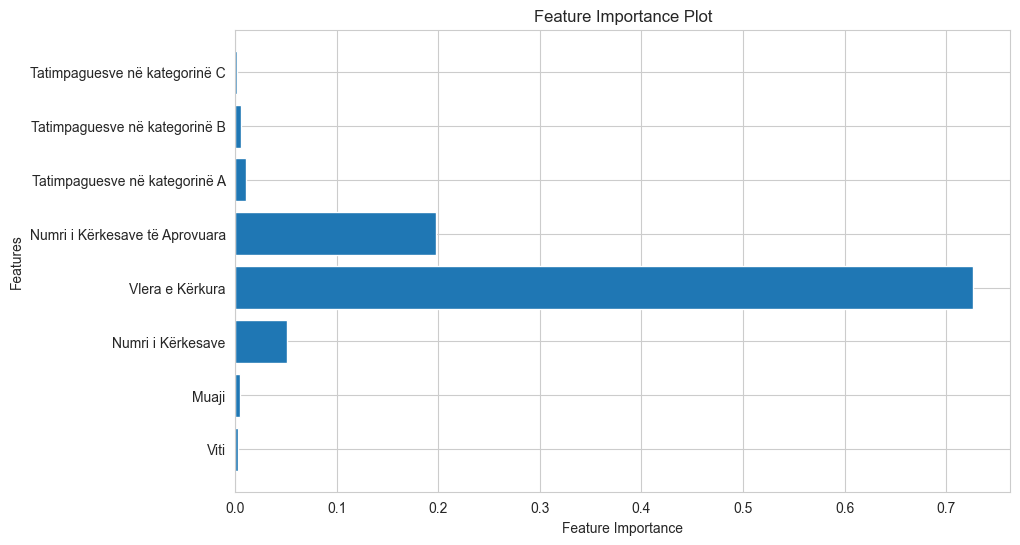

In [145]:
feature_importance_gbr = reimbursement_model_gbr.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X_reimbursement_gbr.columns, feature_importance_gbr)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

Predicted reimbursement values against the actual reimbursement values to visually inspect how well the model is performing.

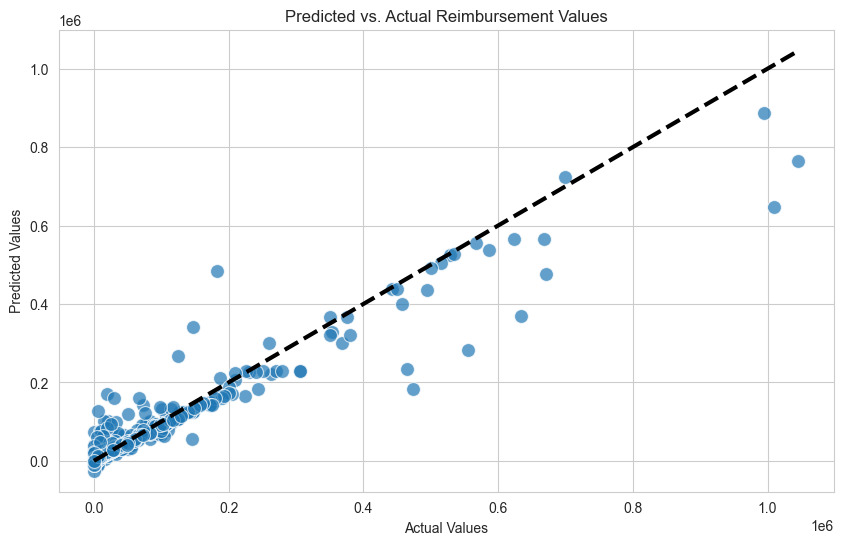

In [146]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_reimbursement_gbr, y=reimbursement_predictions_gbr, alpha=0.7, s=100)
plt.plot([min(y_test_reimbursement_gbr), max(y_test_reimbursement_gbr)], [min(y_test_reimbursement_gbr), max(y_test_reimbursement_gbr)], 'k--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Reimbursement Values')
plt.show()

Residuals (the difference between actual and predicted values) to check for any patterns or heteroscedasticity in the errors.

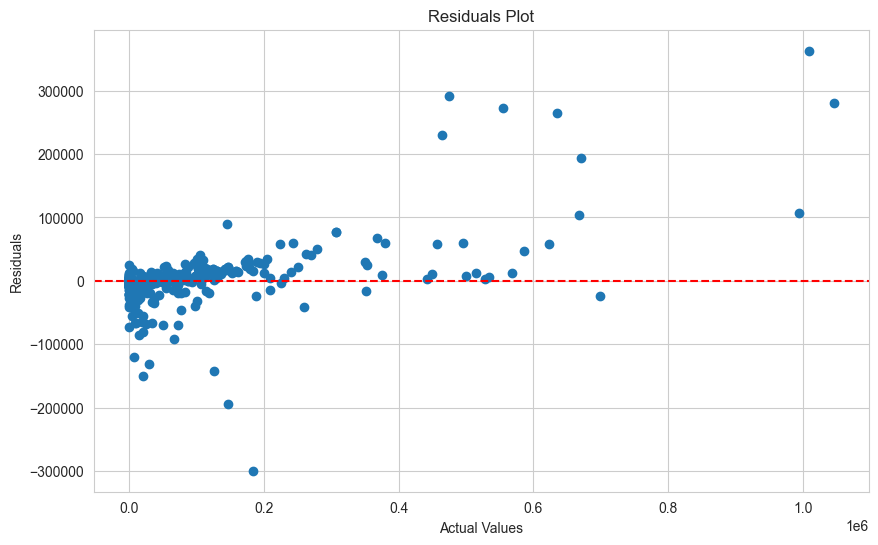

In [147]:
residuals = y_test_reimbursement_gbr - reimbursement_predictions_gbr
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reimbursement_gbr, residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Function to train model using Random Forest Regressor algorithm.

In [148]:
def train_and_evaluate_rf_regressor(df):
    X_reimbursement_rfr = df[['Viti', 'Muaji','Numri i Kërkesave',
                              'Vlera e Kërkura', 'Numri i Kërkesave të Aprovuara',
                              'Tatimpaguesve në kategorinë A',
                              'Tatimpaguesve në kategorinë B', 'Tatimpaguesve në kategorinë C']]
    y_reimbursement_rfr = df['Vlerat e Aprovuara']

    X_train_reimbursement_rfr, X_test_reimbursement_rfr, y_train_reimbursement_rfr, y_test_reimbursement_rfr = \
        train_test_split(X_reimbursement_rfr, y_reimbursement_rfr, test_size=0.2, random_state=42)

    reimbursement_model_rfr = RandomForestRegressor()
    reimbursement_model_rfr.fit(X_train_reimbursement_rfr, y_train_reimbursement_rfr)

    # Predict reimbursement values
    reimbursement_predictions_rfr = reimbursement_model_rfr.predict(X_test_reimbursement_rfr)

    # Calculate Mean Absolute Error
    mae_rfr = mean_absolute_error(y_test_reimbursement_rfr, reimbursement_predictions_rfr)

    # Calculate Mean Squared Error
    mse_rfr = mean_squared_error(y_test_reimbursement_rfr, reimbursement_predictions_rfr)

    # Calculate Root Mean Squared Error
    rmse_rfr = mean_squared_error(y_test_reimbursement_rfr, reimbursement_predictions_rfr, squared=False)

    # Calculate R-squared
    r_squared_rfr = r2_score(y_test_reimbursement_rfr, reimbursement_predictions_rfr)

    return mae_rfr, mse_rfr, rmse_rfr, r_squared_rfr, reimbursement_model_rfr, X_reimbursement_rfr, y_test_reimbursement_rfr,reimbursement_predictions_rfr

Call the function to train dataset using Random Forest Regressor Model.

In [149]:
mae_rfr, mse_rfr, rmse_rfr, r_squared_rfr, reimbursement_model_rfr, X_reimbursement_rfr, y_test_reimbursement_rfr,reimbursement_predictions_rfr = train_and_evaluate_rf_regressor(df)
print("Mean Absolute Error:", mae_rfr)
print("Mean Squared Error:", mse_rfr)
print("Root Mean Squared Error:", rmse_rfr)
print("R-squared:", r_squared_rfr)

Mean Absolute Error: 8683.3993104586
Mean Squared Error: 986186186.4997058
Root Mean Squared Error: 31403.601489314977
R-squared: 0.9242658046523108


The feature importances derived from Random Forest Regressor model.

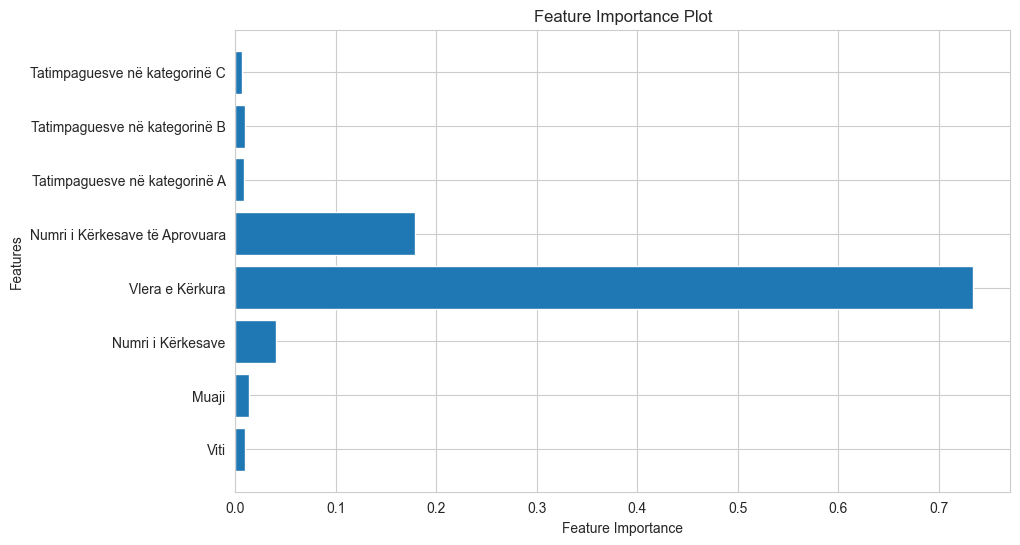

In [150]:
feature_importance_rfr = reimbursement_model_rfr.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X_reimbursement_rfr.columns, feature_importance_rfr)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

Predicted reimbursement values against the actual reimbursement values to visually inspect how well the model is performing.

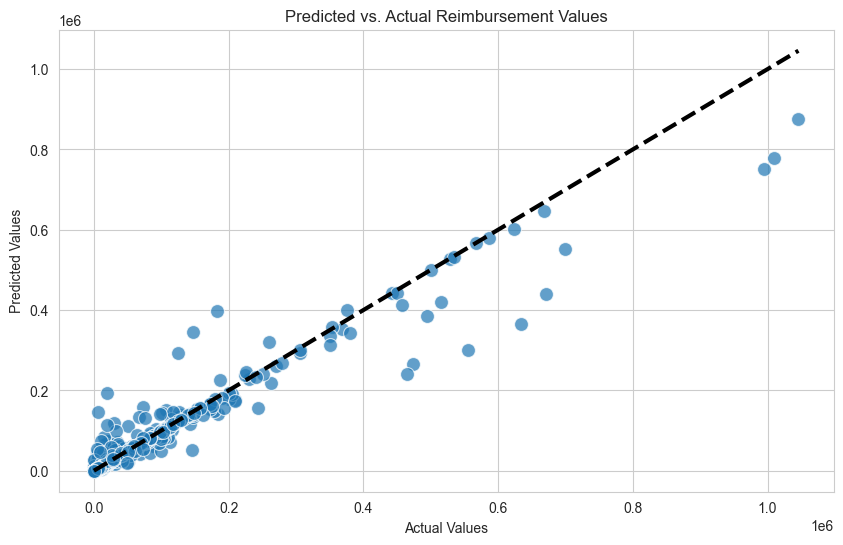

In [151]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_reimbursement_rfr, y=reimbursement_predictions_rfr, alpha=0.7, s=100)
plt.plot([min(y_test_reimbursement_rfr), max(y_test_reimbursement_rfr)], [min(y_test_reimbursement_rfr), max(y_test_reimbursement_rfr)], 'k--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Reimbursement Values')
plt.show()

Residuals (the difference between actual and predicted values) to check for any patterns or heteroscedasticity in the errors.

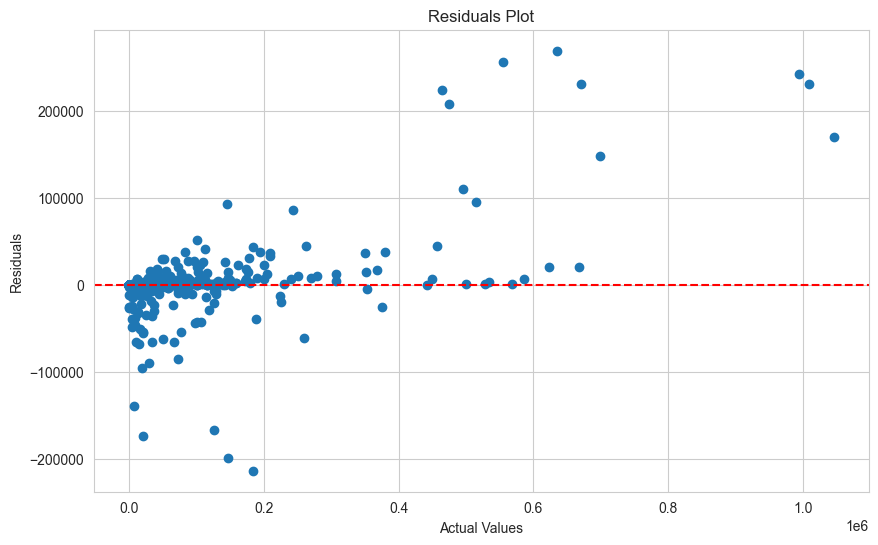

In [152]:
residuals_rfr = y_test_reimbursement_rfr - reimbursement_predictions_rfr
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reimbursement_rfr, residuals_rfr)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

The scatter plots below compare the predicted reimbursement values from two different regression models with the actual reimbursement values.

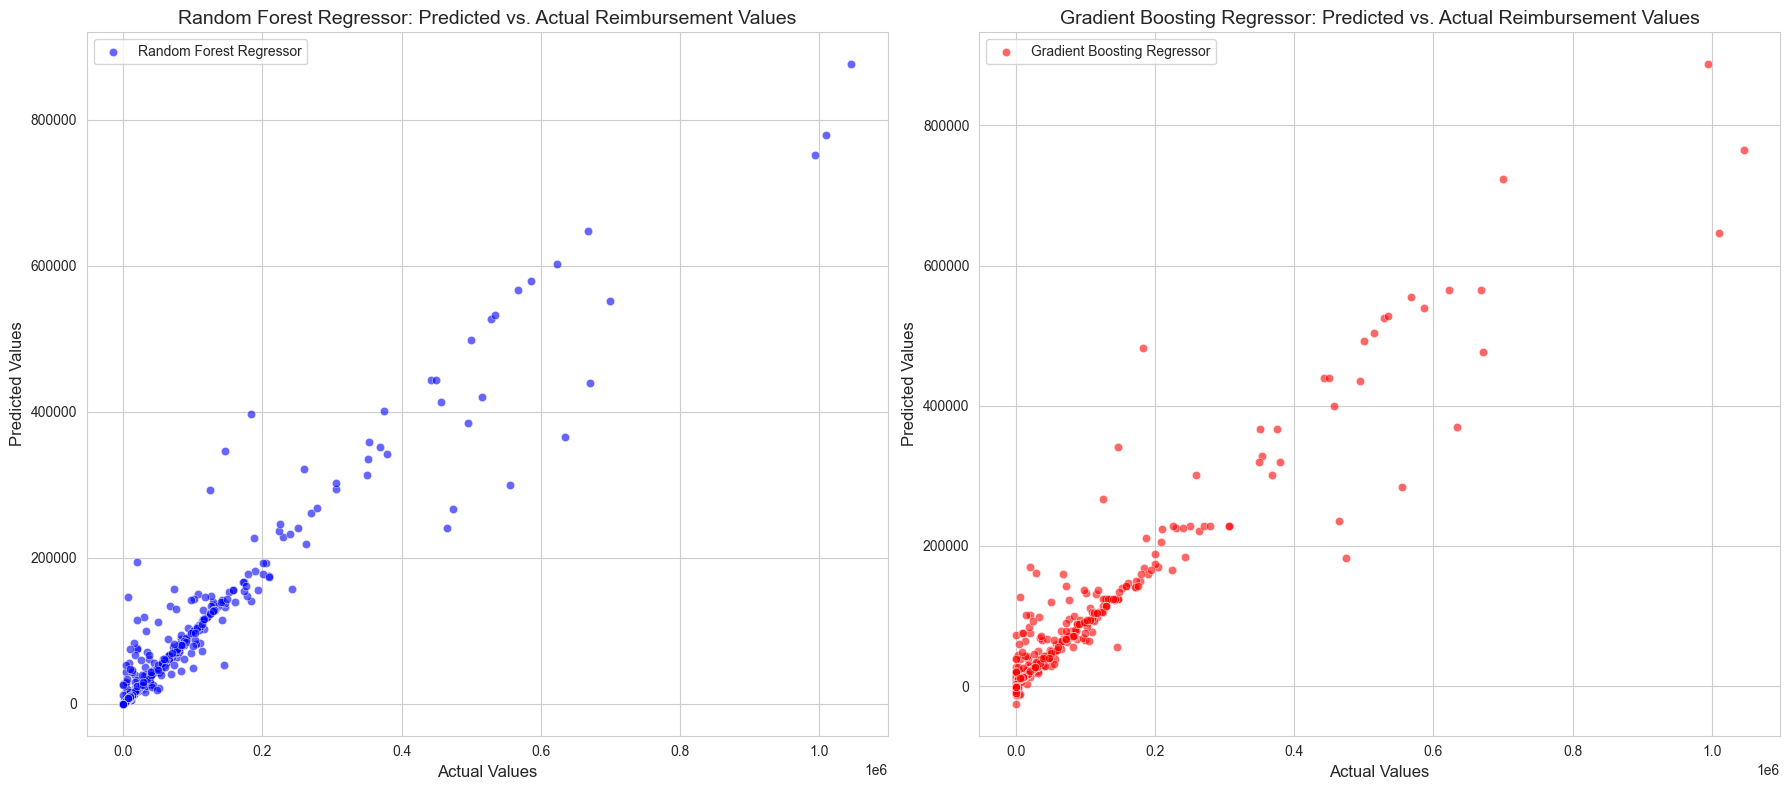

In [153]:
# Create scatter plots for both models
plt.figure(figsize=(18, 8))

# Random Forest Regressor
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_reimbursement_rfr, y=reimbursement_predictions_rfr, alpha=0.6, color='blue', label='Random Forest Regressor')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Random Forest Regressor: Predicted vs. Actual Reimbursement Values', fontsize=14)
plt.legend()

# Gradient Boosting Regressor
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_reimbursement_gbr, y=reimbursement_predictions_gbr, alpha=0.6, color='red', label='Gradient Boosting Regressor')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Gradient Boosting Regressor: Predicted vs. Actual Reimbursement Values', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

With further analysis we remove the rows where 'Vlera e Kërkura' is less than 100000.

In [164]:
df_t=df[df['Vlera e Kërkura']>100000]

print('Dataset after rows deletion: ',df_t.shape)

Dataset after rows deletion:  (792, 14)


Train the dataset with Random Forest Regressor.

In [155]:
mae_rfr_t, mse_rfr_t, rmse_rfr_t, r_squared_rfr_t, reimbursement_model_rfr_t, X_reimbursement_rfr_t, y_test_reimbursement_rfr_t,reimbursement_predictions_rfr_t = train_and_evaluate_rf_regressor(df_t)
print("Mean Absolute Error:", mae_rfr_t)
print("Mean Squared Error:", mse_rfr_t)
print("Root Mean Squared Error:", rmse_rfr_t)
print("R-squared:", r_squared_rfr_t)

Mean Absolute Error: 30158.60207672956
Mean Squared Error: 4321297181.066088
Root Mean Squared Error: 65736.5741506666
R-squared: 0.8662340476335653


Visualise the predicted vs. actual values.

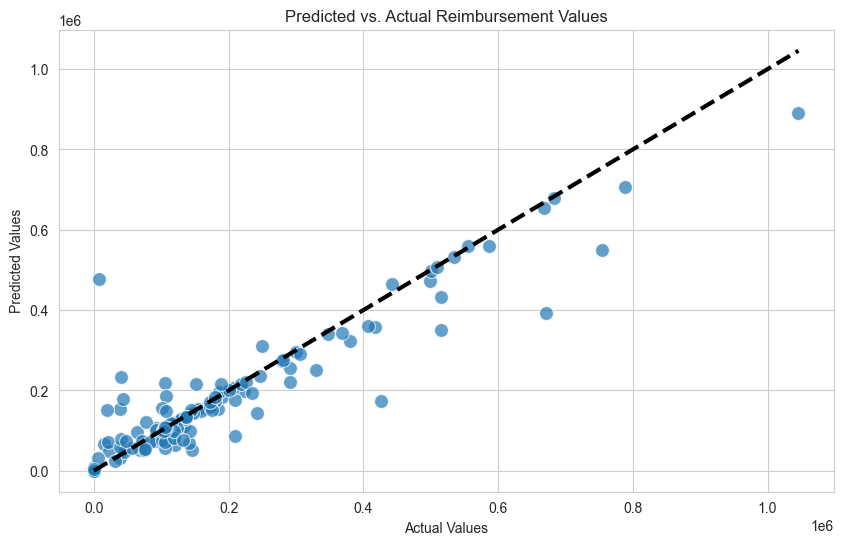

In [156]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_reimbursement_rfr_t, y=reimbursement_predictions_rfr_t, alpha=0.7, s=100)
plt.plot([min(y_test_reimbursement_rfr_t), max(y_test_reimbursement_rfr_t)], [min(y_test_reimbursement_rfr_t), max(y_test_reimbursement_rfr_t)], 'k--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Reimbursement Values')
plt.show()

Train the dataset using Gradient Boosting Regressor.

In [157]:
mae_gbr_t, mse_gbr_t, rmse_gbr_t, r_squared_gbr_t,reimbursement_model_gbr_t, X_reimbursement_gbr_t,y_test_reimbursement_gbr_t,reimbursement_predictions_gbr_t = train_and_evaluate_gb_regressor(df_t)
print("Mean Absolute Error:", mae_gbr_t)
print("Mean Squared Error:", mse_gbr_t)
print("Root Mean Squared Error:", rmse_gbr_t)
print("R-squared:", r_squared_gbr_t)

Mean Absolute Error: 37659.02566044428
Mean Squared Error: 5410344281.050412
Root Mean Squared Error: 73555.04252633134
R-squared: 0.8325225447219864


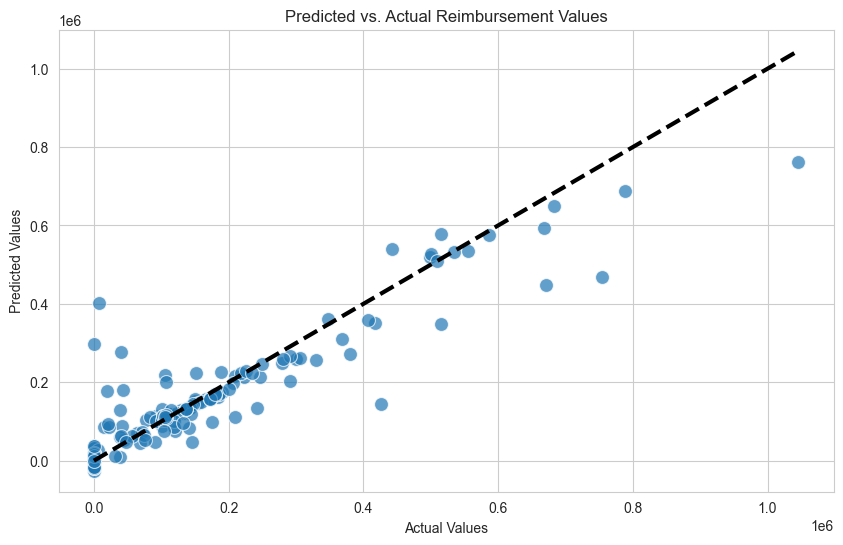

In [158]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_reimbursement_gbr_t, y=reimbursement_predictions_gbr_t, alpha=0.7, s=100)
plt.plot([min(y_test_reimbursement_gbr_t), max(y_test_reimbursement_gbr_t)], [min(y_test_reimbursement_gbr_t), max(y_test_reimbursement_gbr_t)], 'k--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Reimbursement Values')
plt.show()

Now we analyse by removing rows where 'Vlera e Kërkura' is grater than 100000, that means we are removing datas where the required amont is very high.

In [159]:
df_t1=df[df['Vlera e Kërkura']<100000]

print('Dataset after rows deletion: ',df_t.shape)

(3113, 14)

Train the dataset with Random Forest Regressor.

In [160]:
mae_rfr_t1, mse_rfr_t1, rmse_rfr_t1, r_squared_rfr_t1, reimbursement_model_rfr_t1, X_reimbursement_rfr_t1, y_test_reimbursement_rfr_t1,reimbursement_predictions_rfr_t1 = train_and_evaluate_rf_regressor(df_t1)
print("Mean Absolute Error:", mae_rfr_t1)
print("Mean Squared Error:", mse_rfr_t1)
print("Root Mean Squared Error:", rmse_rfr_t1)
print("R-squared:", r_squared_rfr_t1)

Mean Absolute Error: 1867.1898695024076
Mean Squared Error: 34146837.63297841
Root Mean Squared Error: 5843.529552674343
R-squared: 0.9419820405763618


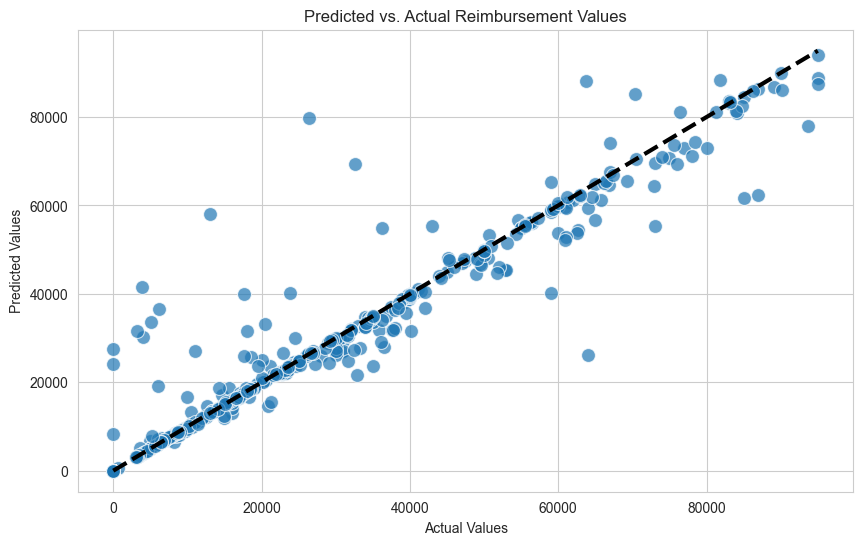

In [161]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_reimbursement_rfr_t1, y=reimbursement_predictions_rfr_t1, alpha=0.7, s=100)
plt.plot([min(y_test_reimbursement_rfr_t1), max(y_test_reimbursement_rfr_t1)], [min(y_test_reimbursement_rfr_t1), max(y_test_reimbursement_rfr_t1)], 'k--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Reimbursement Values')
plt.show()

Train the dataset using Gradient Boosting Regressor.

In [162]:
mae_gbr_t1, mse_gbr_t1, rmse_gbr_t1, r_squared_gbr_t1,reimbursement_model_gbr_t1, X_reimbursement_gbr_t1,y_test_reimbursement_gbr_t1,reimbursement_predictions_gbr_t1 = train_and_evaluate_gb_regressor(df_t1)
print("Mean Absolute Error:", mae_gbr_t1)
print("Mean Squared Error:", mse_gbr_t1)
print("Root Mean Squared Error:", rmse_gbr_t1)
print("R-squared:", r_squared_gbr_t1)

Mean Absolute Error: 2393.572409007479
Mean Squared Error: 36689967.70322908
Root Mean Squared Error: 6057.224422392576
R-squared: 0.937661077715592


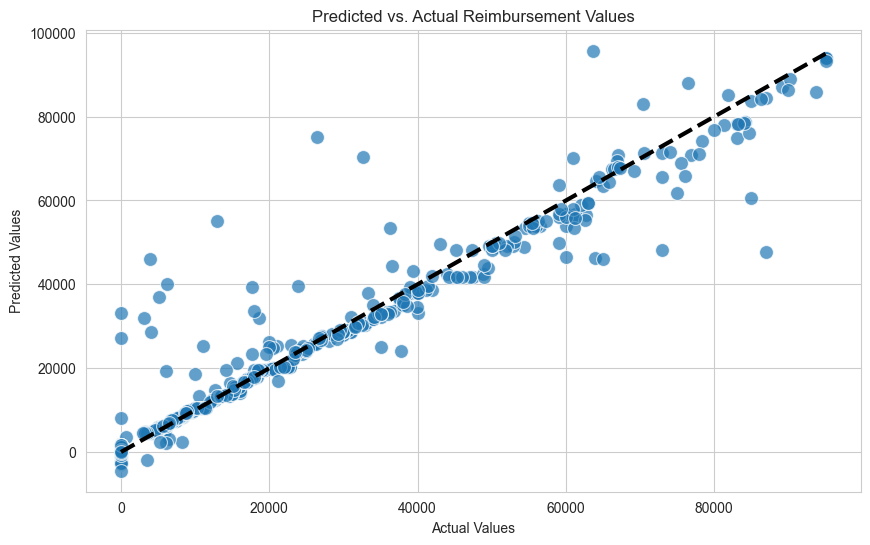

In [163]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_reimbursement_gbr_t1, y=reimbursement_predictions_gbr_t1, alpha=0.7, s=100)
plt.plot([min(y_test_reimbursement_gbr_t1), max(y_test_reimbursement_gbr_t1)], [min(y_test_reimbursement_gbr_t1), max(y_test_reimbursement_gbr_t1)], 'k--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Reimbursement Values')
plt.show()